In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random

In [2]:
import src
import src.features as lf
import src.models as lm
import src.visualization as lv
from src.models.models import *

lm.models.RECORD_DIR='./models/records'

### PATH 


In [3]:
PATH = './dataset/'


Data loading
---------

In [4]:
#### Data building
data = lf.data_builder.create_dataset_from_directory(PATH)


Model Loading
---------

In [ ]:

#### Train Campaigns
campaign_id='test'

#### Stage 1
stage1_resnet = Stage1ResNetv2(data)
stage1_resnet.fit_or_load(campaign_id, training=True)

In [ ]:
stage1_mobilenet = Stage1MobileNetv3(data)
stage1_mobilenet.fit_or_load(campaign_id, training=True)

Model evaluation
-------

In [ ]:
img = data.dataframe.iloc[8]
print(f"Pred : {stage1_mobilenet.single_prediction(img.path)}")
print(f"Actual : {img.label}")

In [ ]:
results = stage1_mobilenet.evaluate()
display(results)

In [ ]:
stage1_mobilenet.display_samples(nb=6, gradcam=True)

In [ ]:
stage1_resnet.evaluate()
stage1_resnet.display_samples(nb=6, gradcam=True)

In [ ]:
stage1_resnet.print_classification_report();

In [ ]:
stage1_mobilenet.print_classification_report();

In [ ]:
stage1_mobilenet.single_prediction(data.dataframe.iloc[8].path)


In [ ]:
stage1_resnet.single_prediction(data.dataframe.iloc[8].path)

>>> Stage-1_ResNetv2 –– Evaluation
1/1 [==============================] - 0s 498ms/step


'Common wheat'

## __Background Removal__

- Two colors : **black** and **white**

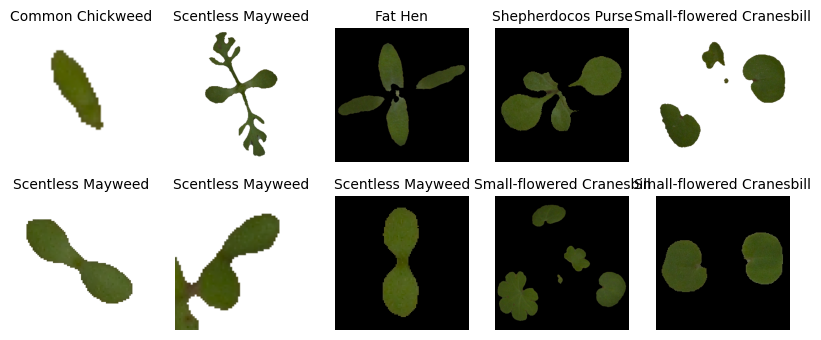

In [16]:
np.random.seed(3)

f, axes = plt.subplots(2, 5, figsize=(10, 4))
colors  = ['white', 'black']
index   = -1
for i in range(2):
    for j in range(5):
        index = random.sample(range(data.dataframe.shape[0]), 1)[0]
        img = data.dataframe.iloc[index]
        img = plt.imread(img.path)
        image_without_bg = remove_background(x=tf.constant(img, dtype=tf.float32), color=colors[np.random.choice([0, 1])])
        axes[i, j].axis('off')
        axes[i, j].imshow(image_without_bg)
        axes[i, j].set_title(data.dataframe.label[index], fontsize='medium')

plt.show()

## __Histogram of Colors__

### *Hyper parameters* 

- **data** : is a dataframe 
- **select_index** : is a list of integer valeurs use to select images in the dataframe
- **figsize** : is a  tuple to resize figure 

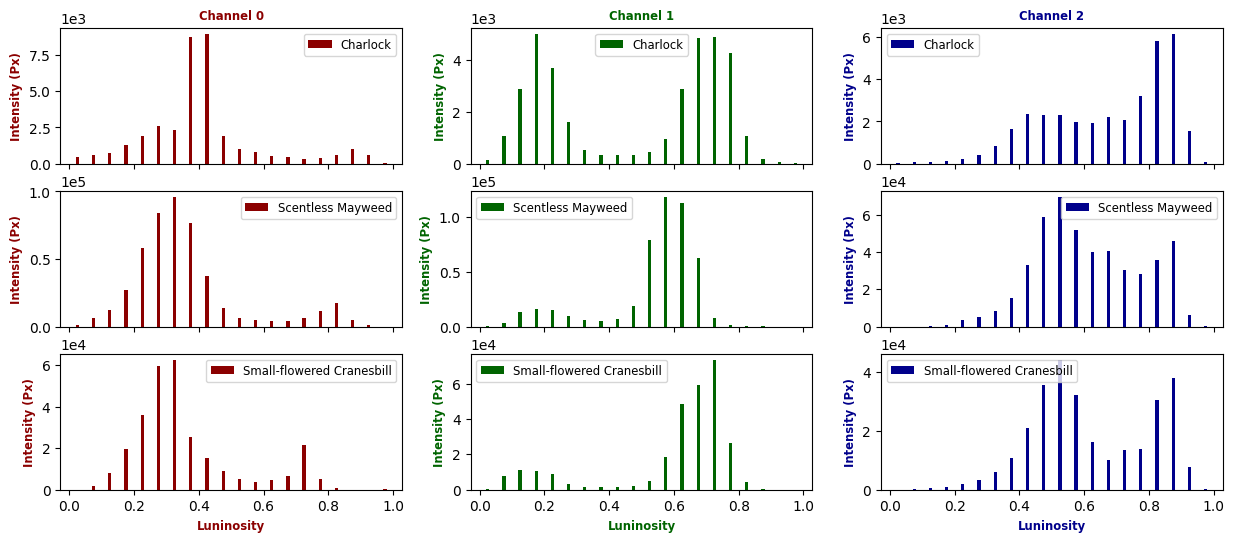

In [17]:
select_index = random.sample(range(data.dataframe.shape[0]), 3)
Plot_Histograms(data=data, select_index=select_index , figsize=(15, 6))